In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

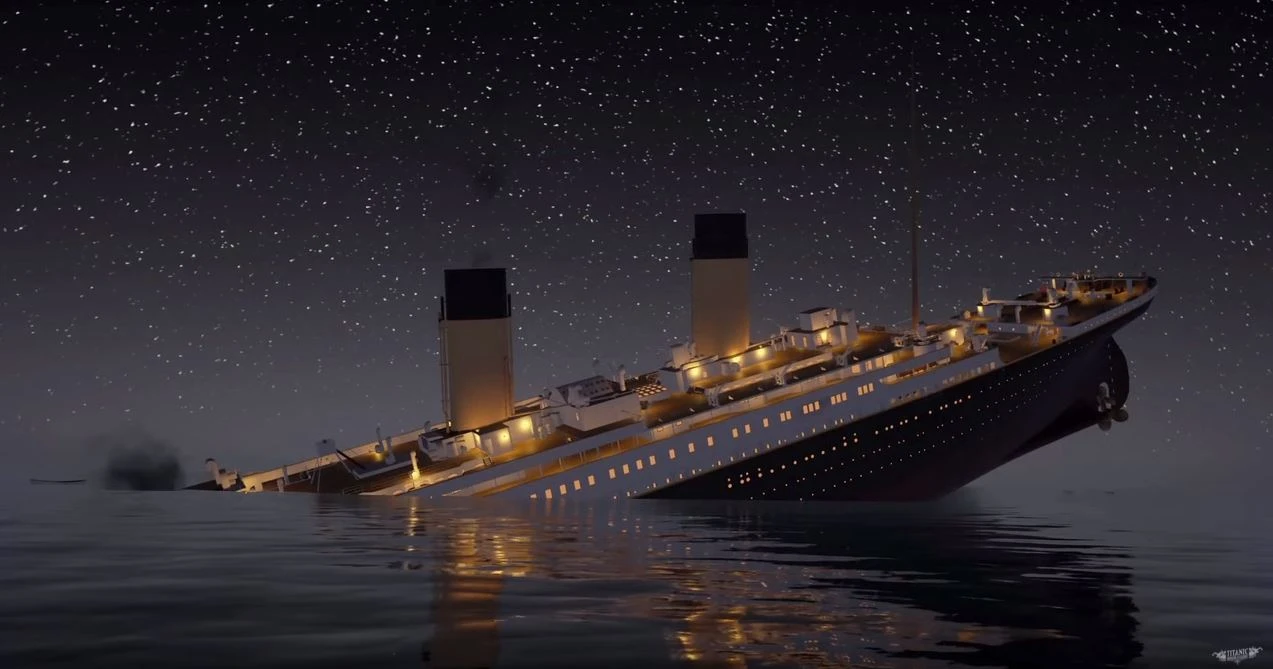

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/titanic.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


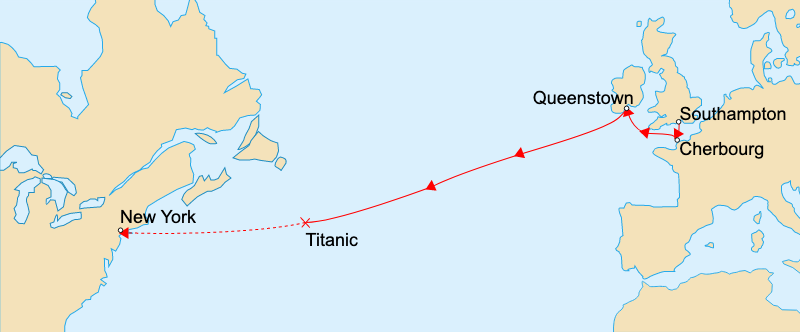

In [4]:
# Summary of all numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>Only 38% of the passengers who were traveling in RMS titanic survived.

>The average age of the passengers traveling was 29.699118 

>The average fare paid by the passengers traveling was 32.204208

>Some passengers were traveling free of cost.

>75% of the passengers paid 31 dollars or lesser than that. And only 25% of the passengers paid more than 31 dollars to max 512 dollars, which is a huge variation.

In [12]:
df.Fare.quantile([0.0,0.25,0.5,0.75,1.0]).values.tolist()

[0.0, 7.9104, 14.4542, 31.0, 512.3292]

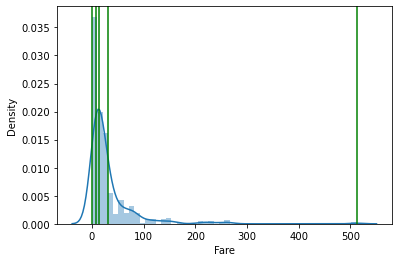

In [15]:
sns.distplot(df.Fare)
plt.axvline(df.Fare.quantile(0.0), color='green')
plt.axvline(df.Fare.quantile(0.25), color='green')
plt.axvline(df.Fare.quantile(0.50), color='green')
plt.axvline(df.Fare.quantile(0.75), color='green')
plt.axvline(df.Fare.quantile(1.0), color='green')
plt.show()

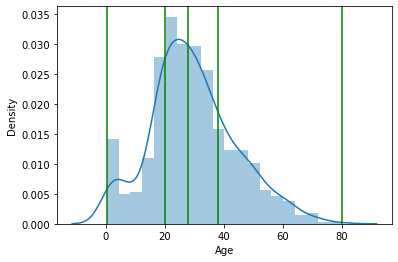

In [16]:
sns.distplot(df.Age)
plt.axvline(df.Age.quantile(0.0), color='green')
plt.axvline(df.Age.quantile(0.25), color='green')
plt.axvline(df.Age.quantile(0.50), color='green')
plt.axvline(df.Age.quantile(0.75), color='green')
plt.axvline(df.Age.quantile(1.0), color='green')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [20]:
df.shape

(891, 12)

In [21]:
# !pip install missingno

In [22]:
import missingno as mno

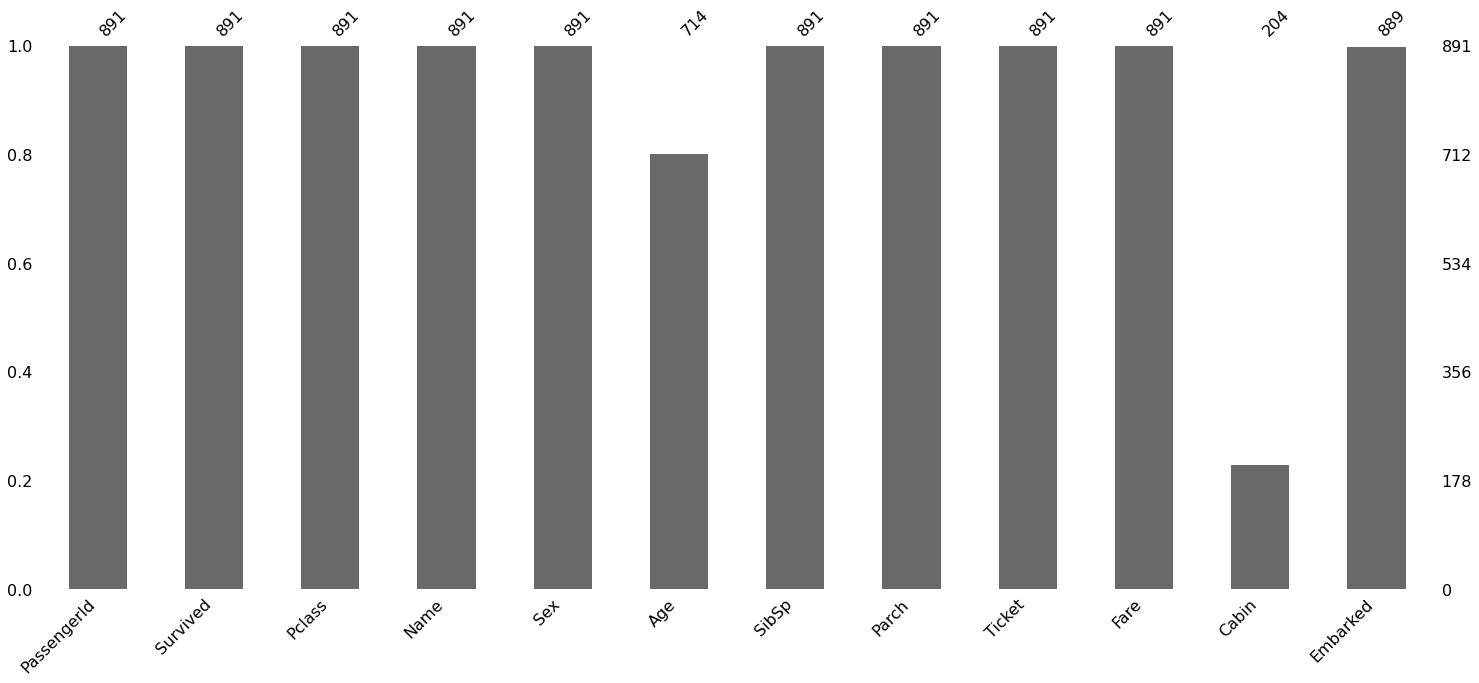

In [23]:
mno.bar(df)
plt.show()

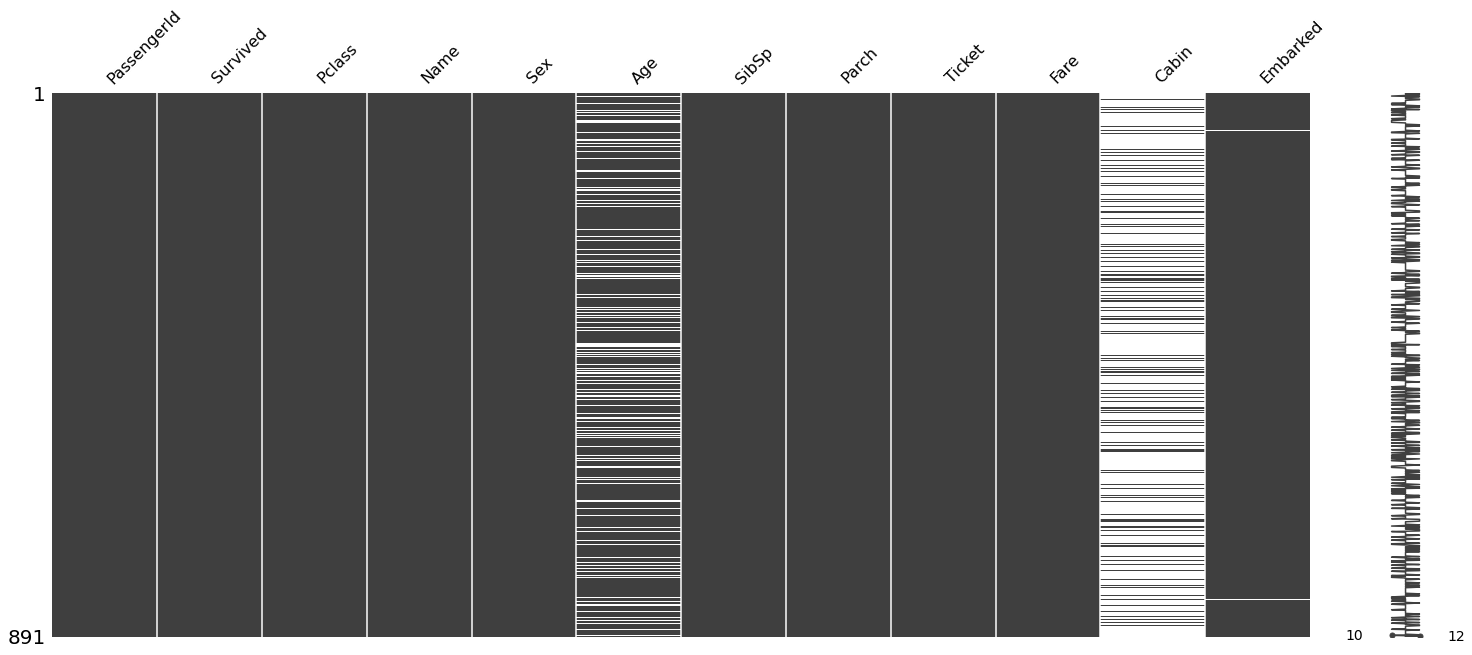

In [24]:
mno.matrix(df)
plt.show()

In [26]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [27]:
df.shape

(891, 12)

In [29]:
687/891
# Cabin col has more than 71% of missing rows. So its better to drop this column 
# as it wont be helpful for any future analysis.

0.7710437710437711

In [30]:
df.drop(['Cabin'], axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [31]:
177/891

0.19865319865319866

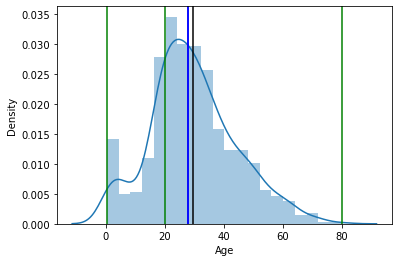

In [33]:
sns.distplot(df.Age)
plt.axvline(df.Age.quantile(0.0), color='green')
plt.axvline(df.Age.quantile(0.25), color='green')
plt.axvline(df.Age.quantile(0.50), color='blue')
plt.axvline(df.Age.quantile(0.50), color='blue')
plt.axvline(df.Age.mean(), color='black')
plt.axvline(df.Age.quantile(1.0), color='green')
plt.show()

In [35]:
df.Age.fillna(df.Age.median(), inplace=True)
df.isna().sum().sort_values(ascending=False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [36]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

>Most of the passengers embarked from Southampton.

Lets fill the missing values in this categorical column by the mode of the Embarked column.

In [39]:
df.Embarked.mode()

0    S
dtype: object

In [40]:
type(df.Embarked.mode())

pandas.core.series.Series

In [41]:
df.Embarked.mode()[0]

'S'

In [42]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

## Dataset is clean now.

## Feature Engineering

In [43]:
# Create a new feature/col named FamilySize

df['FamilySize'] = df.Parch + df.SibSp + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [44]:
df.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

## Segment Sex column as per Age; if Age<15 then child, else Sex column data must be copied.

In [45]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.00,0,0,345783,9.5000,S,1
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,S,7
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.00,1,0,2926,26.0000,S,2
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,C,2
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S,3


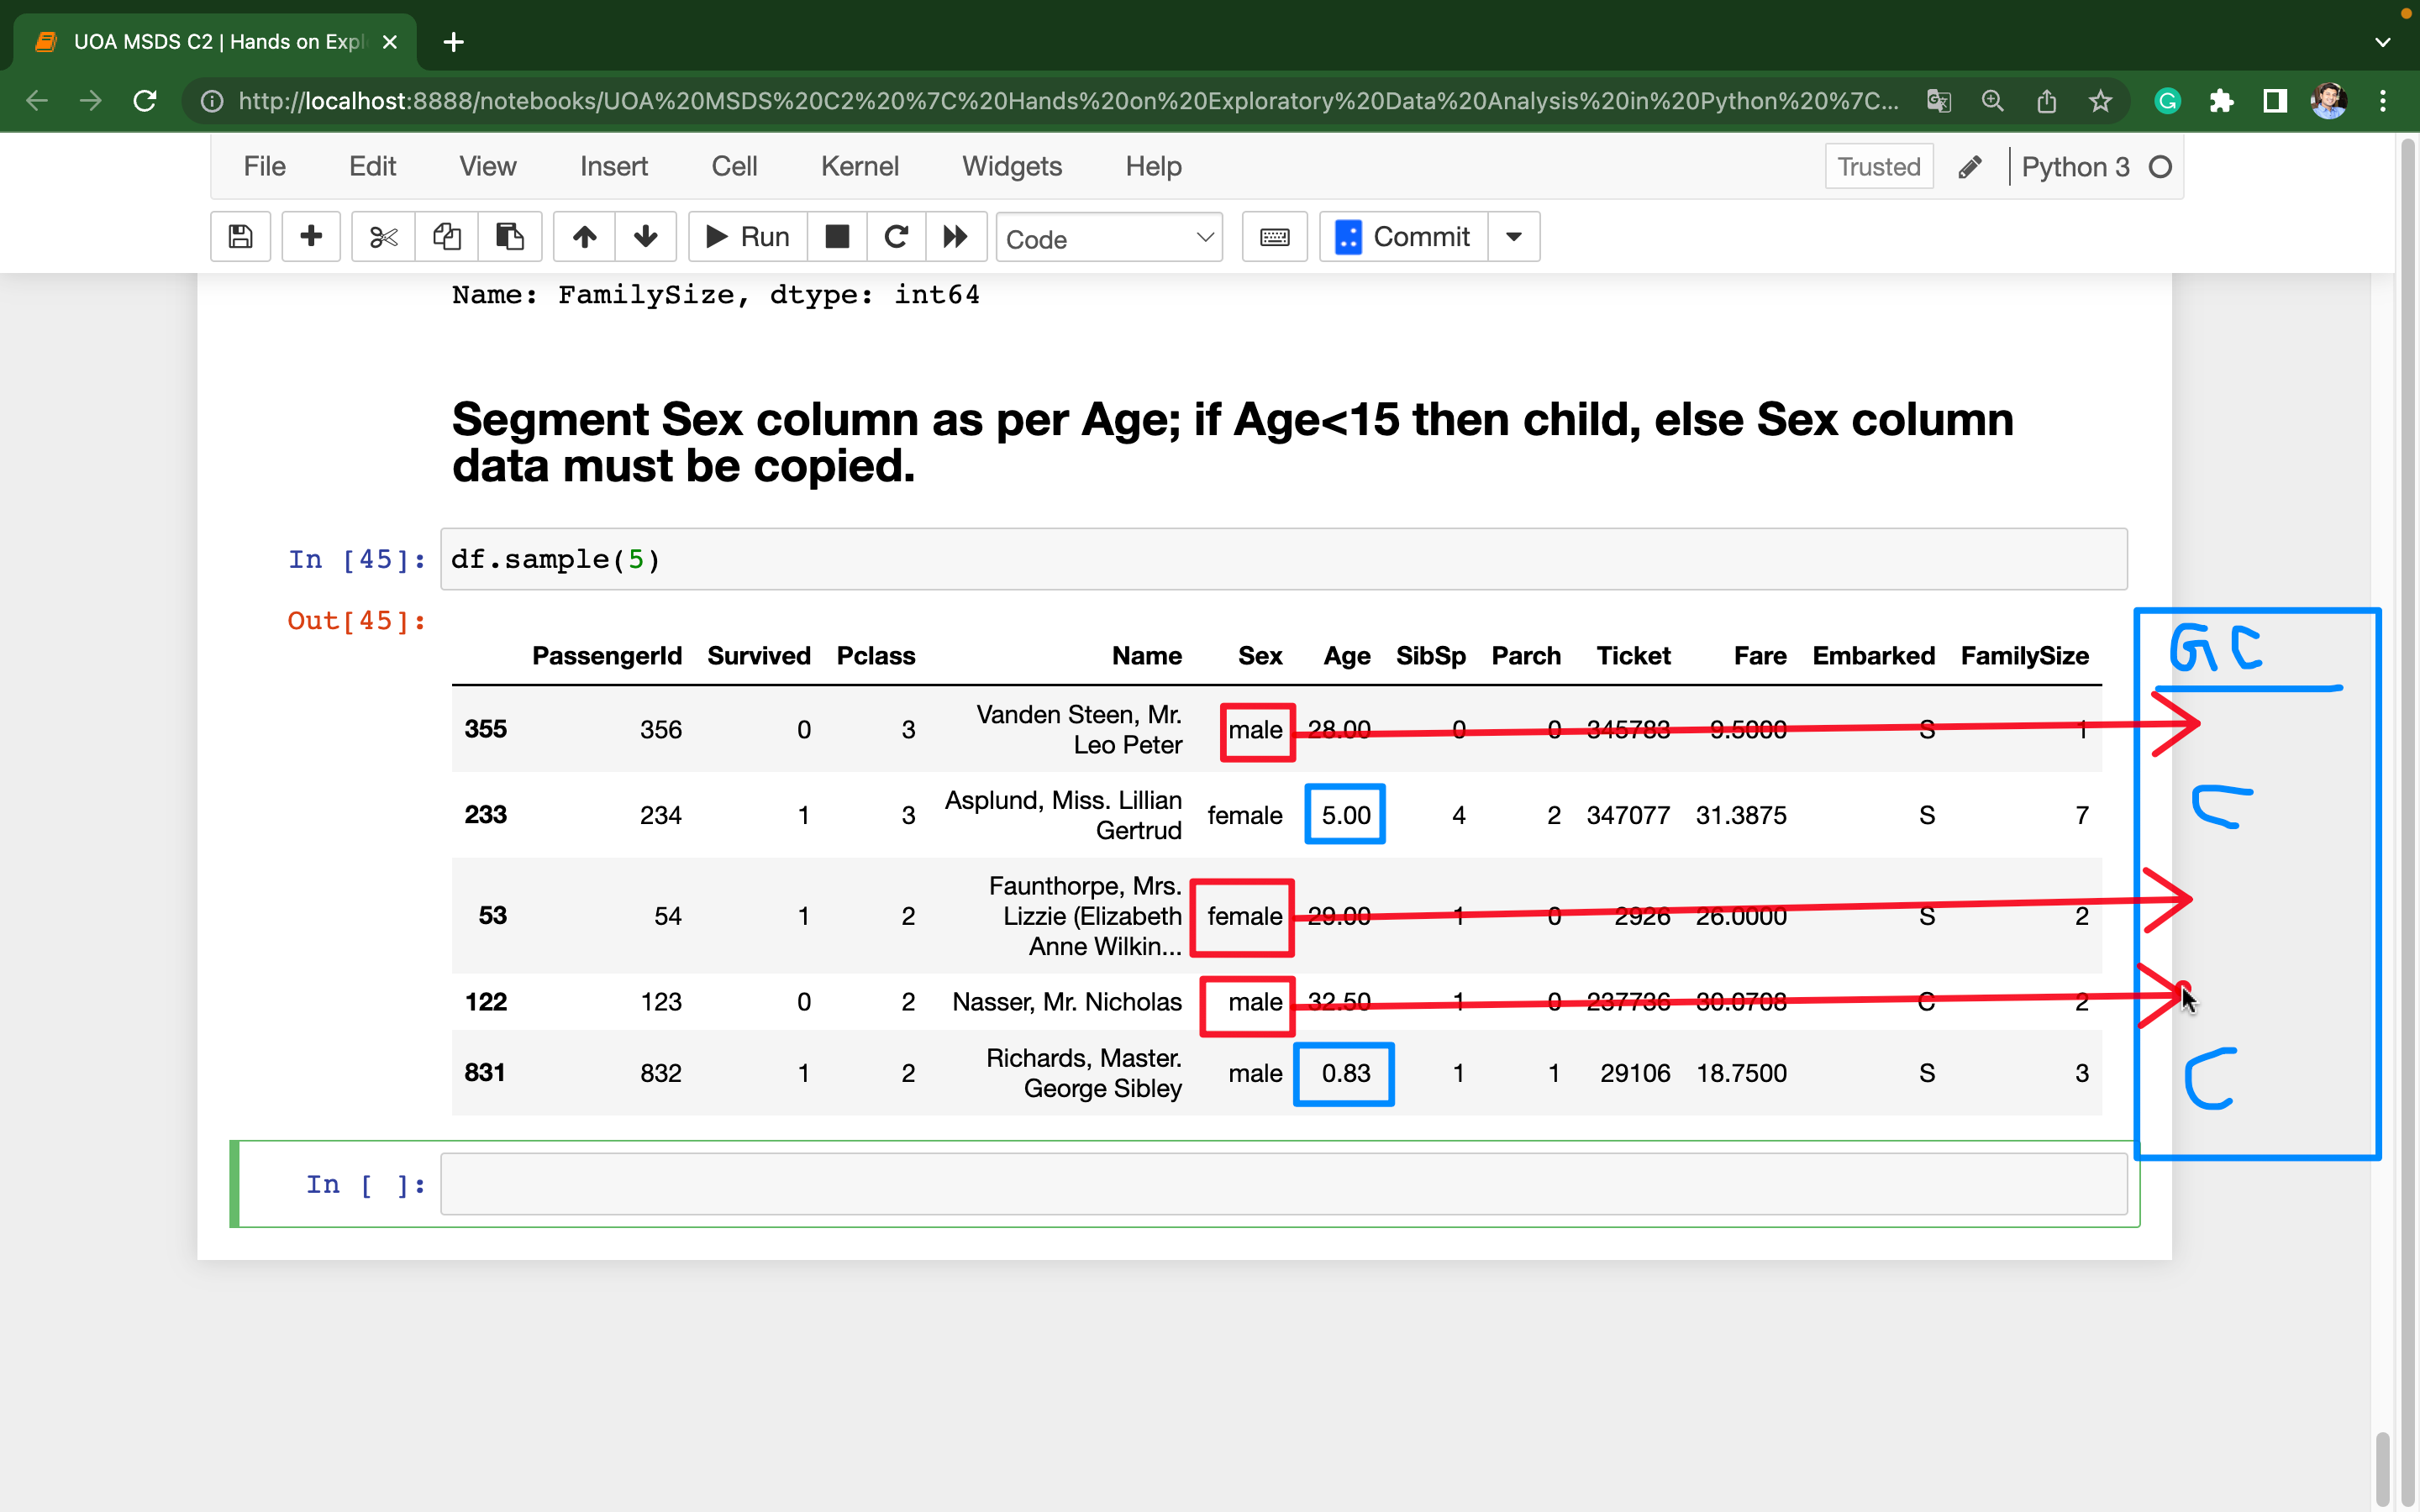

In [46]:
df["GenderClass"] = df.apply(lambda x: 'child' if x.Age<15 else x['Sex'], axis=1)

In [48]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S,1,male
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,S,1,male
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,S,3,male
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C,2,female
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,S,3,child


In [49]:
df.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [51]:
df.GenderClass.value_counts(normalize=True)*100

male      60.381594
female    30.864198
child      8.754209
Name: GenderClass, dtype: float64

## Drawing a pairplot to know the joint relationship between 'Fare', Age', 'Pclass' and 'Survived'

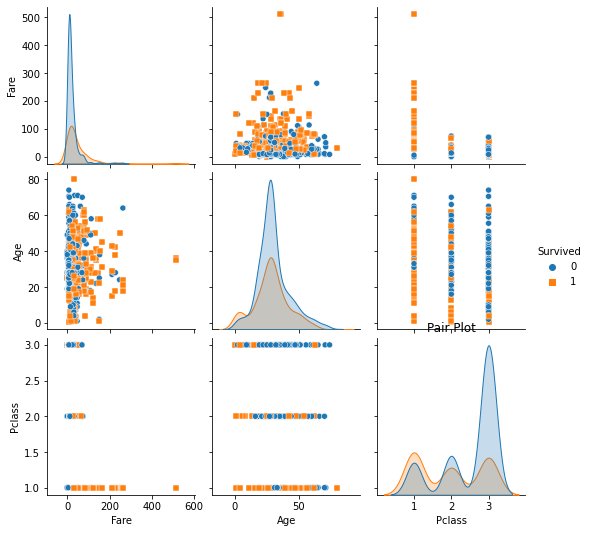

In [52]:
sns.pairplot(df[['Fare','Age','Pclass','Survived']], vars=['Fare','Age','Pclass'],
            hue='Survived', dropna=True, markers=['o','s'])
plt.title("Pair Plot")
plt.show()

>More people of passenger class1 survived than died.

>More people of passenger class3 died than survived.

>Most of the people paying less fare died.

## Eshtablishing correlation between all features using heatmap.

In [53]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


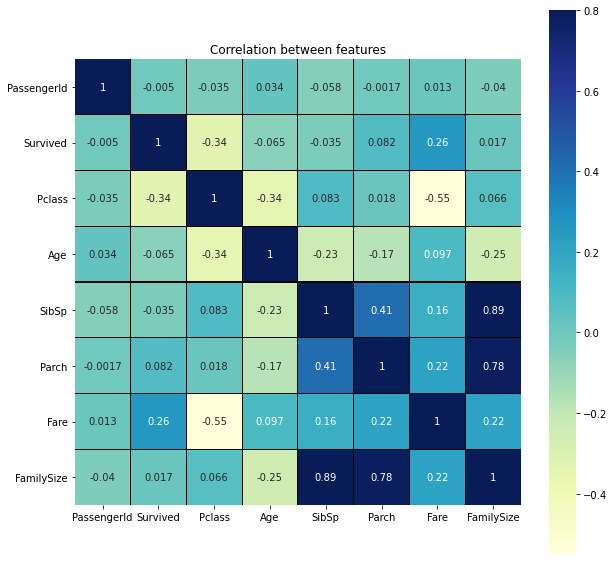

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=0.8, linewidth=0.1, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title("Correlation between features")
plt.show()

>Age and pclass are negatively correlated with Survived.

>FamilySize is made from Parch and SibSp and therefore there is a high correlation between them.

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


## Find out how many males vs females survived?

In [63]:
df.groupby(["Sex"]).mean()["Survived"]

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [65]:
df.groupby(["Sex"]).mean()[["Survived"]]*100

,Survived
Sex,
female,74.203822
male,18.890815


>We clearly see gender biasing. Females were given larger preference when it came to survival.

In [66]:
df.groupby(["GenderClass"]).mean()[["Survived"]]*100

,Survived
GenderClass,
child,57.692308
female,76.000000
male,16.356877


>60% of children survived.

>76% of females survived.

>Gender biasing is observed again.

In [68]:
df.groupby(["Sex"]).describe()["Survived"]

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [69]:
df.groupby(["Sex"]).aggregate(['min','max',np.median, np.mean])["Survived"]

,min,max,median,mean
Sex,,,,
female,0,1,1,0.742038
male,0,1,0,0.188908


In [70]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

In [71]:
df.groupby(["Pclass"]).mean()[["Survived"]]*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


>Most of the Pclass1 passengers survived.

>Least of Pclass3 passengers survived.

>__YOU NEED TO BE RICH TO SURVIVE-Quote of the day.__

In [72]:
df.groupby(["Embarked"]).mean()[["Survived"]]*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.900929


>Most of the passengers who survived embarked from Cherboug.

>Most of the passengers who died embarked from Southampton.

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [75]:
df.groupby(['Sex','Pclass']).mean()[["Survived"]]

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [76]:
df.groupby(['Sex','Pclass']).mean()[["Survived"]].unstack()

Survived                    
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

>We clearly see Gender biasing and Pclass biasing evident from this insight.

In [78]:
df.pivot_table("Survived", index="Sex", columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [79]:
df.pivot_table("Survived", index="Sex", columns='Pclass',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [81]:
df.pivot_table("Survived", index="Sex", columns='Pclass',aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [83]:
df.groupby(['Sex','Embarked']).mean()[["Survived"]].unstack()

Survived                    
Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.692683
male      0.305263  0.073171  0.174603

In [84]:
df.groupby(['Embarked','Pclass']).mean()[["Survived"]].unstack()

Survived                    
Pclass           1         2         3
Embarked                              
C         0.694118  0.529412  0.378788
Q         0.500000  0.666667  0.375000
S         0.589147  0.463415  0.189802

In [85]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

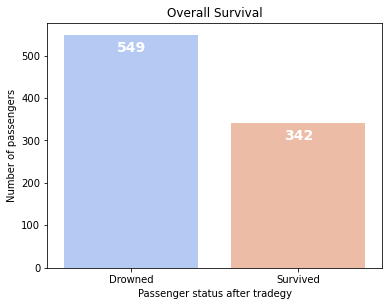

In [100]:
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x="Survived", data=df, palette="coolwarm")

plt.xticks(np.arange(2), ['Drowned','Survived'])
plt.title("Overall Survival")
plt.xlabel("Passenger status after tradegy")
plt.ylabel("Number of passengers")

labels = df.Survived.value_counts()
# print(labels)
for i,v in enumerate(labels):
    ax.text(i,v-40,str(v), horizontalalignment='center',size=14,color='w',fontweight='bold')
plt.show()

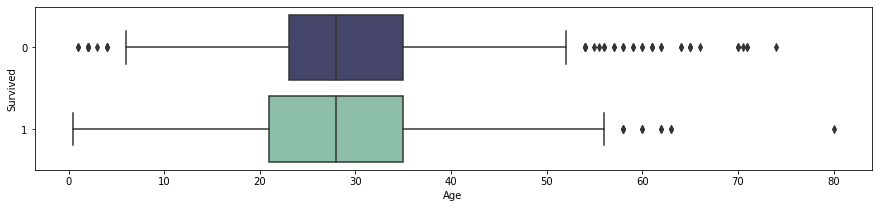

In [102]:
# Box plot of Age vs Survived

plt.figure(figsize=(15,3))

sns.boxplot(y='Survived', x='Age', data=df,
           palette=['#3f3e6fd1','#85c6a9'], orient='h')
plt.show()

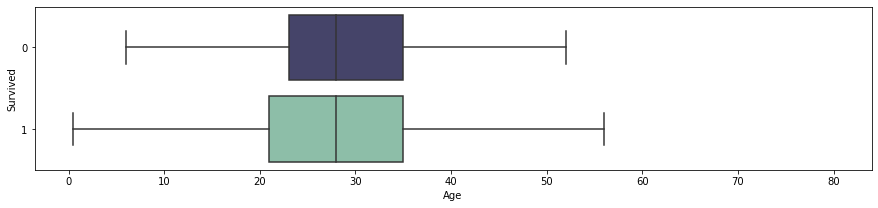

In [103]:
# Box plot of Age vs Survived

plt.figure(figsize=(15,3))

sns.boxplot(y='Survived', x='Age', data=df,
           palette=['#3f3e6fd1','#85c6a9'], orient='h', fliersize=0)
plt.show()

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


## Create Title feature from Name

In [105]:
df['Title'] = df['Name'].str.extract(pat='([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male,Mr


In [108]:
# How is the title associated with the sex of the passengers?
# Create a crosstab between Sex and Title

pd.crosstab(index=df['Sex'], columns=df['Title'])

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


>There are a lot of titles for passengers. We will simplify these into selected categories.

>We will arrange Males and Females into Mr, Mrs, Master and Miss and put the neutral titles as Other.

In [109]:
df['Title'].replace(to_replace=['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],
                   value=['Miss','Miss','Miss','Other','Mr','Mrs','Mrs',
                         'Other','Other','Other','Mr','Mr','Mr'],
                   inplace=True)

In [110]:
# How is the title associated with the sex of the passengers?
# Create a crosstab between Sex and Title

pd.crosstab(index=df['Sex'], columns=df['Title'])

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


In [111]:
df.Title.value_counts()

Mr        522
Miss      186
Mrs       127
Master     40
Other      16
Name: Title, dtype: int64

In [113]:
df.Title.value_counts(normalize=True)*100

Mr        58.585859
Miss      20.875421
Mrs       14.253648
Master     4.489338
Other      1.795735
Name: Title, dtype: float64

# Happy Learning